In [176]:
logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 1
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Middlware part

In [1]:
mw=1
path_to_experiment="/home/anastasiia/final_ex/final_copy/"
path_to_logs = "/home/anastasiia/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif j == 8 or j == 32:
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call"):
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs + "log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()

line numer=176028
condition not ok
line numer=176033
condition not ok
line numer=269212
condition not ok
line numer=269215
condition not ok
line numer=269218
condition not ok


In [197]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware1_logs/"

logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 1
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 

data=[]
k = 0
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs + "log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_3 = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[k].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_3.loc[k] = newline
                    k += 1
                m += 1    


k=0
k=144
k=288
k=432
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47
m=48
m=49
m=50
m=51
m=52
m=53
m=54
m=55
m=56
m=57
m=58
m=59
m=60
m=61
m=62
m=63
m=64
m=65
m=66
m=67
m=68
m=69
m=70
m=71
m=72
m=73
m=74
m=75
m=76
m=77
m=78
m=79
m=80
m=81
m=82
m=83
m=84
m=85
m=86
m=87
m=88
m=89
m=90
m=91
m=92
m=93
m=94
m=95
m=96
m=97
m=98
m=99
m=100
m=101
m=102
m=103
m=104
m=105
m=106
m=107
m=108
m=109
m=110
m=111
m=112
m=113
m=114
m=115
m=116
m=117
m=118
m=119
m=120
m=121
m=122
m=123
m=124
m=125
m=126
m=127
m=128
m=129
m=130
m=131
m=132
m=133
m=134
m=135
m=136
m=137
m=138
m=139
m=140
m=141
m=142
m=143


In [21]:
global_data_3.to_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_3.pkl")

In [83]:
global_data_3 = pd.read_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_3.pkl")

Start drawing graphs


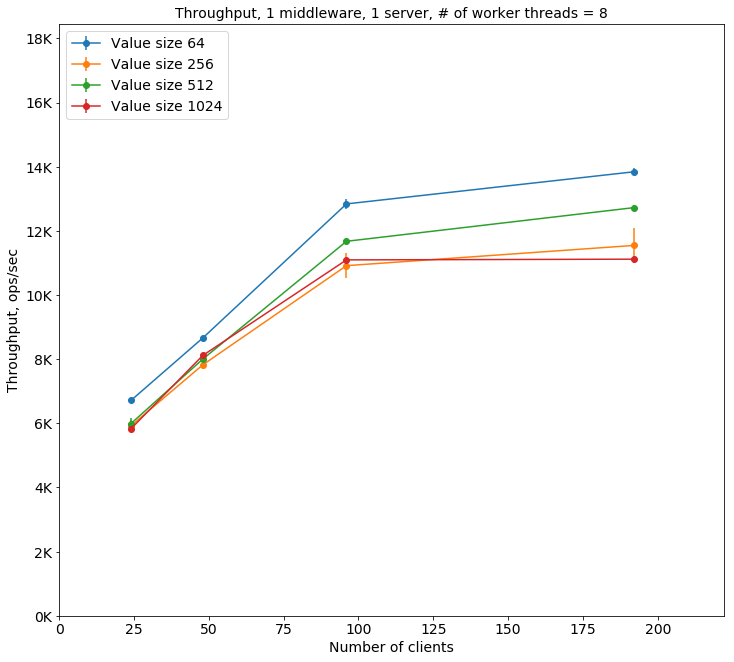

[[6713.302564102564, 8661.184615384615, 12841.184615384618, 13842.123076923077], [5922.276923076922, 7823.492307692308, 10915.902564102564, 11546.497435897436], [5992.2717948717955, 8001.85641025641, 11675.445787545788, 12724.711355311354], [5830.266666666666, 8116.5589743589735, 11095.907692307694, 11118.097435897434]]


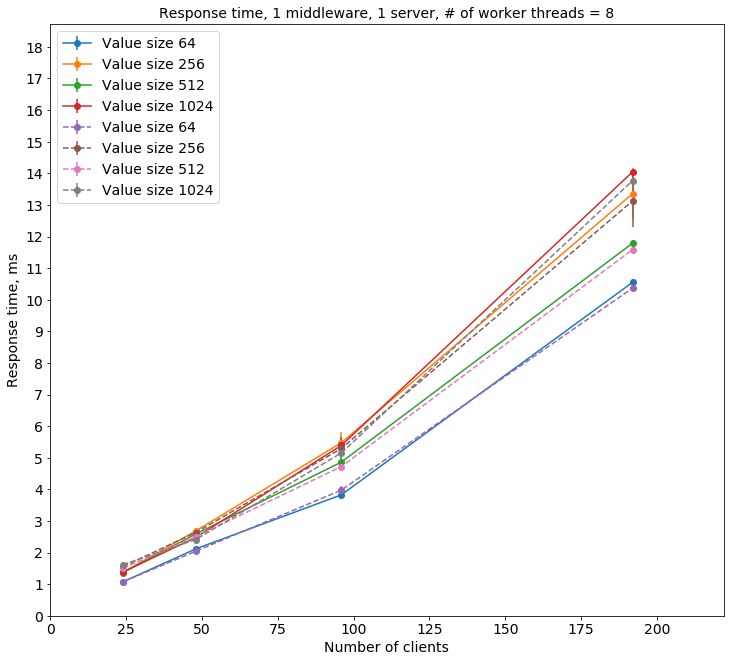

[[1.0731360773175953, 2.116357625030271, 3.827578412567576, 10.552778697798692], [1.3724061431673888, 2.685805604553282, 5.475331919885409, 13.358763474504645], [1.365864408259185, 2.588145571348187, 4.862641412149422, 11.79136155754783], [1.3833417480134613, 2.4790175702852477, 5.3900458565920815, 14.047668642808743]]


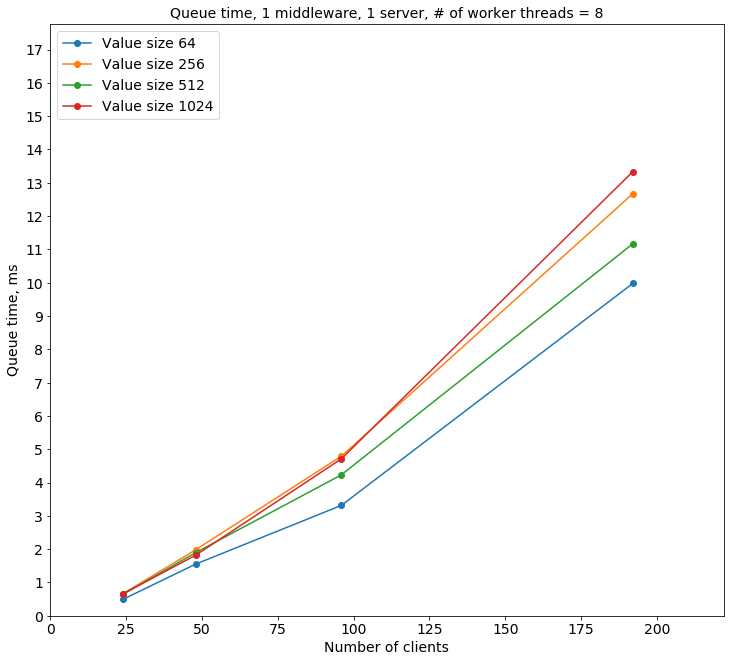

[[0.49366432051479875, 1.5525501041783234, 3.3138974717166043, 9.976034875337783], [0.6620400677494103, 1.9837412762744162, 4.790869214098838, 12.667063871517037], [0.64129866417685, 1.897104005352604, 4.231584676847785, 11.1647023363689], [0.6602503997706048, 1.8192128911519279, 4.712020416859623, 13.329233603425045]]


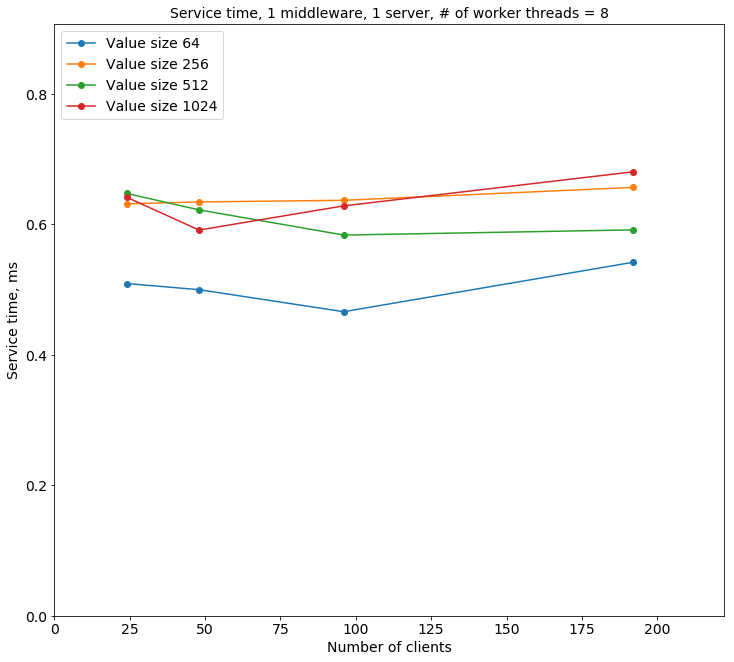

[[0.5091857422003309, 0.4997462892208149, 0.46600940643306726, 0.541812542466066], [0.6313779177100977, 0.6342298442363925, 0.6367196106738652, 0.6565369806894488], [0.6472661796005623, 0.6220332204962694, 0.5834443560830403, 0.5914113076576658], [0.6413798198965258, 0.5911321521245898, 0.628207581265812, 0.6803995703009508]]


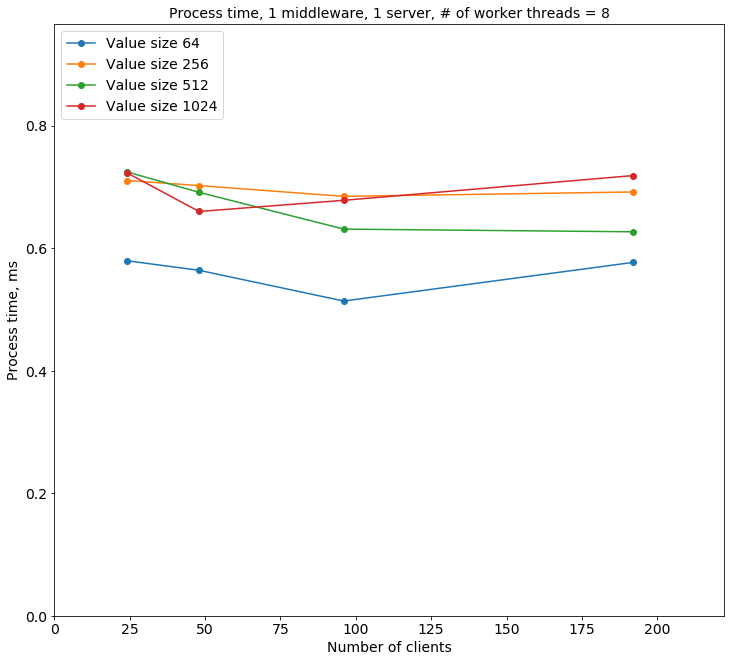

[[0.5794717568027964, 0.5638075208519473, 0.5136809408509719, 0.576743822460909], [0.7103660754179786, 0.7020643282788656, 0.6844627057865706, 0.6916996029876081], [0.7245657440823351, 0.6910415659955831, 0.6310567353016371, 0.6266592211789282], [0.7230913482428565, 0.6598046791333196, 0.6780254397324585, 0.7184350393836982]]


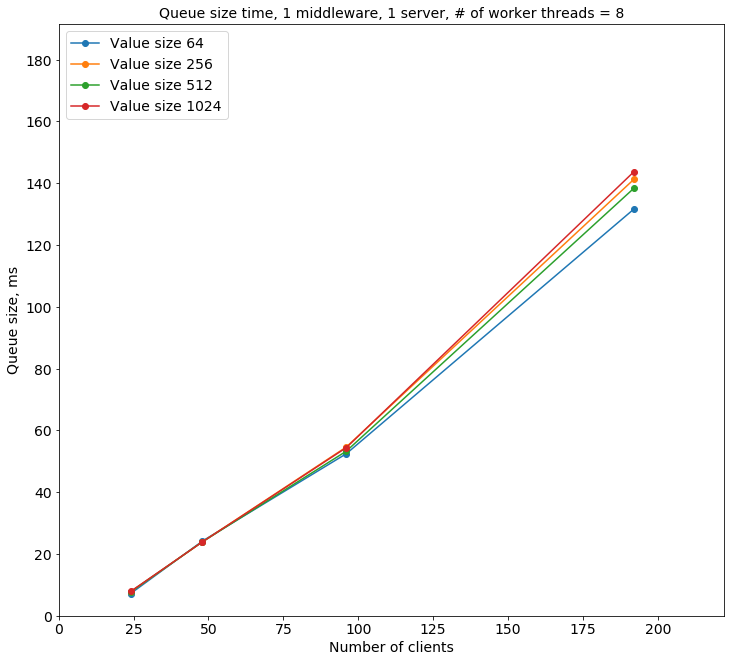

[[7.188968859379082, 24.193798325686483, 52.44980673162593, 131.61888201528296], [7.751328317937315, 23.948441282370453, 54.619408710227994, 141.2439514347119], [7.720254207770179, 23.96407179872363, 53.26985401525498, 138.3555124772175], [7.878574406589135, 23.939478584141693, 54.42106491559374, 143.69951186077307]]


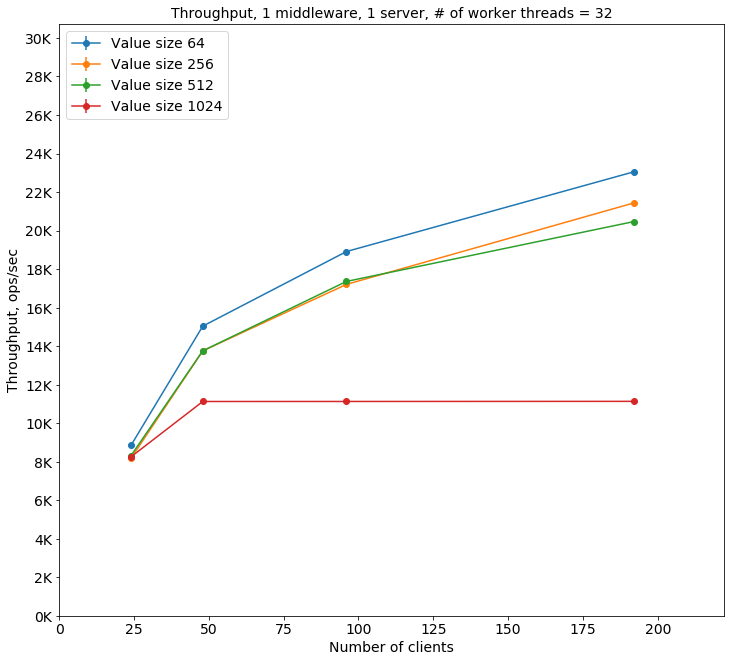

[[8842.753846153844, 15038.65238095238, 18911.89230769231, 23051.17435897436], [8174.425641025642, 13755.405128205128, 17206.071794871794, 21434.846153846152], [8307.841025641024, 13756.67179487179, 17359.964102564103, 20467.082051282054], [8248.994871794872, 11126.199633699633, 11127.953846153847, 11133.632967032967]]


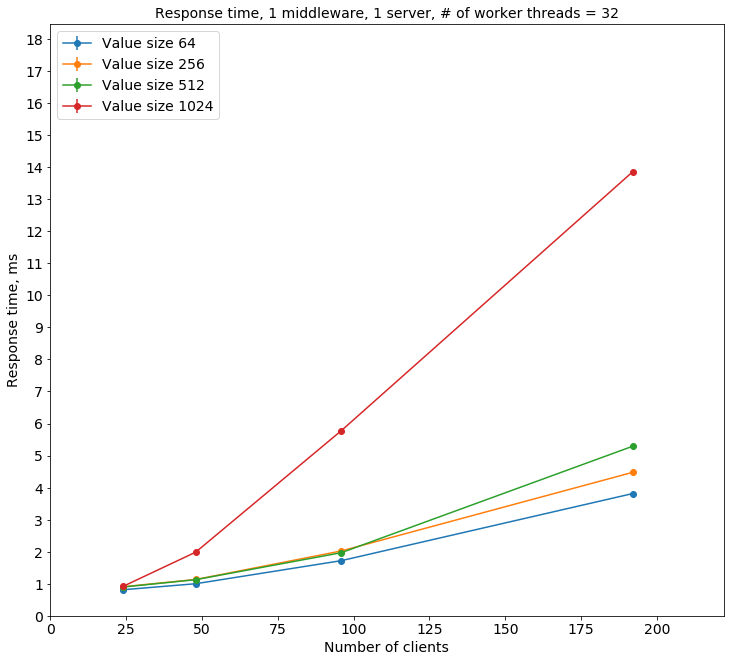

[[0.8122640759897862, 1.0010012533124326, 1.7210825693994198, 3.8142064734896426], [0.9068294926076514, 1.1329457809405645, 2.024046073181083, 4.476434609831343], [0.8967697491835023, 1.1274939414013005, 1.9698593255982744, 5.290771848529259], [0.9162744924945013, 1.9865704433811888, 5.778430480688274, 13.854606890530775]]


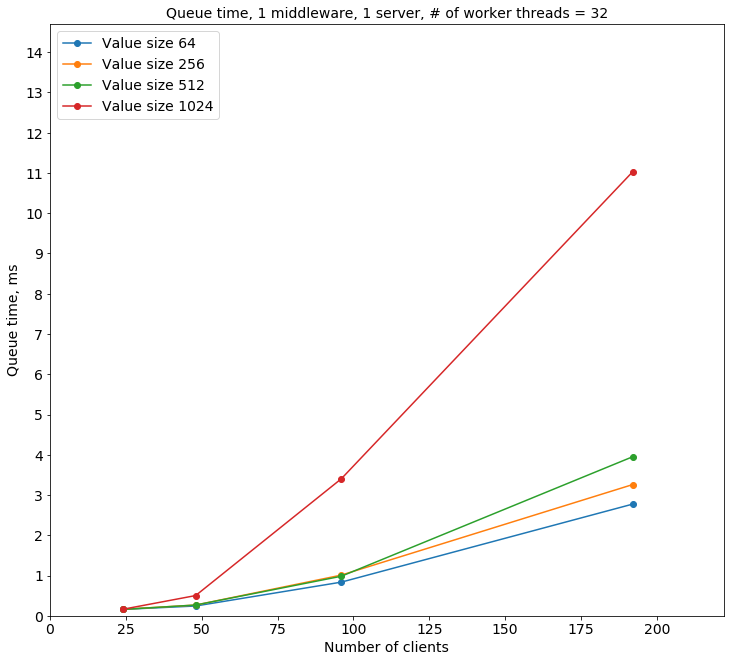

[[0.15915914348529317, 0.24326398603898403, 0.8362745026260778, 2.774269913163109], [0.1615432245533757, 0.2670129858509699, 1.010983898349539, 3.259507224636615], [0.15902307921648318, 0.2672549375575712, 0.9827253571657509, 3.9507574514273203], [0.16198647978246303, 0.502794978161916, 3.403264866349517, 11.029423705308464]]


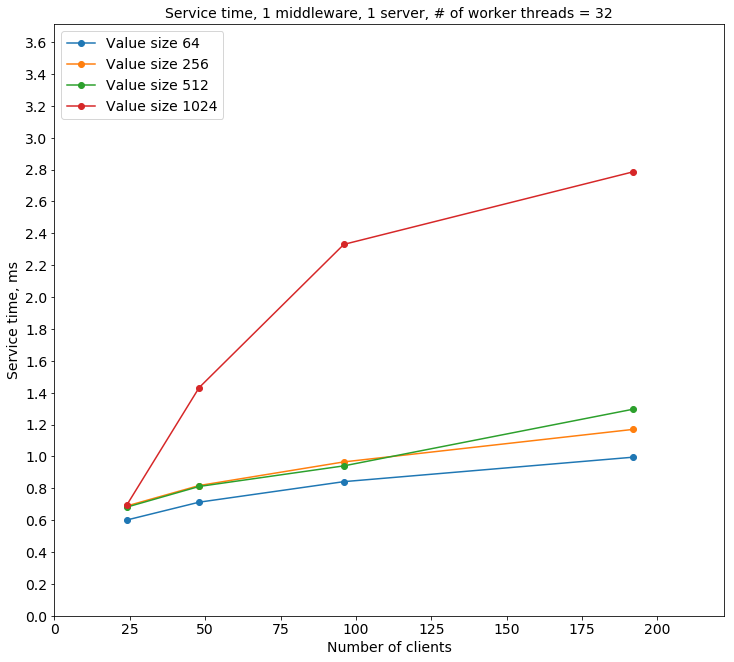

[[0.6011498912335582, 0.7129884601482227, 0.8417831786212935, 0.9953770640530246], [0.6892139524583552, 0.817485266397843, 0.9656948769426653, 1.169832013292518], [0.6820334697712203, 0.8116281852609699, 0.9408719089280876, 1.296548980088352], [0.6952331099857387, 1.4320215203656592, 2.3307305095829354, 2.786147981684172]]


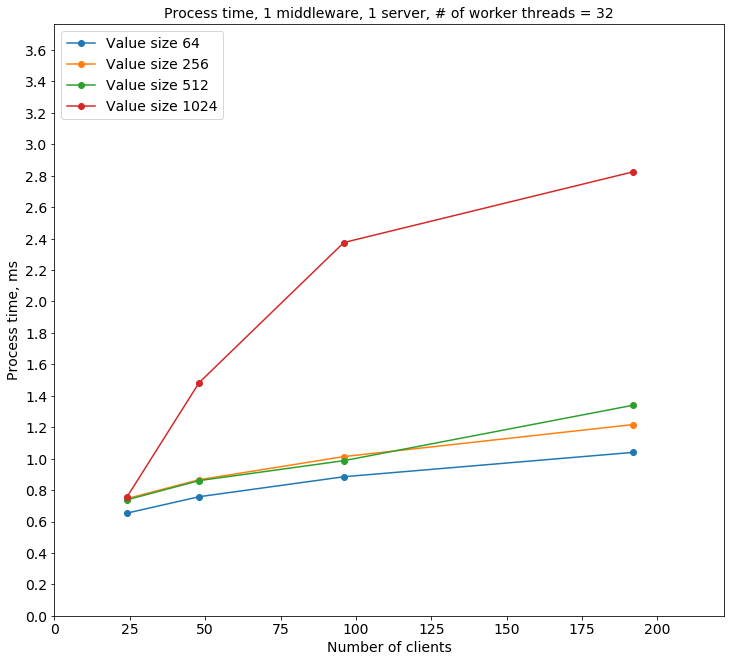

[[0.6531049325044931, 0.7577372672734485, 0.8848080667733422, 1.0399365603265334], [0.7452862680542757, 0.8659327950895945, 1.0130621748315443, 1.2169273851947284], [0.7377466699670191, 0.8602390038437294, 0.9871339684325237, 1.340014397101938], [0.7542880127120384, 1.4837754652192727, 2.375165614338757, 2.8251831852223104]]


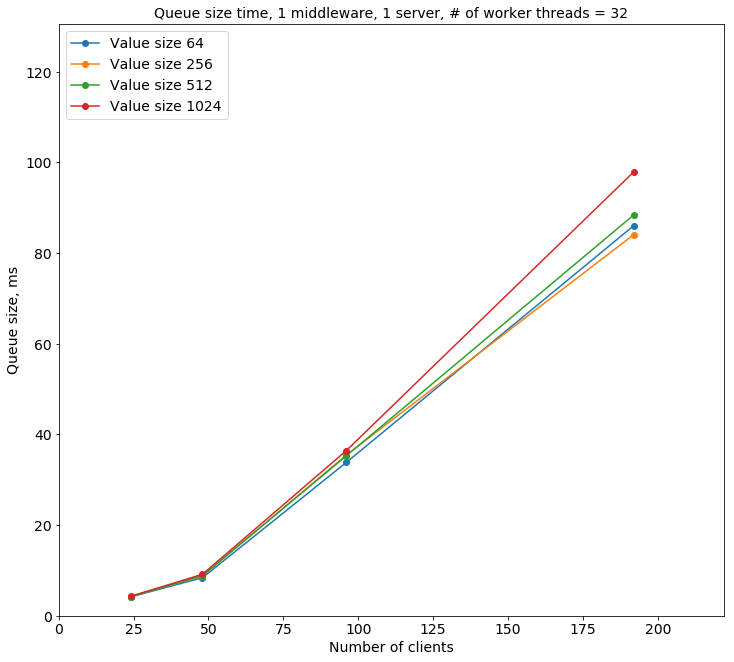

[[4.1674144903229475, 8.394031918399351, 33.81491011353865, 86.04879844822413], [4.222451134338303, 8.817394299825821, 35.42977493931778, 84.07564509742703], [4.222954650811807, 8.839597457792975, 35.26750793824753, 88.41907342897827], [4.298961676138942, 9.158302853488678, 36.41684950489665, 97.91216585201113]]


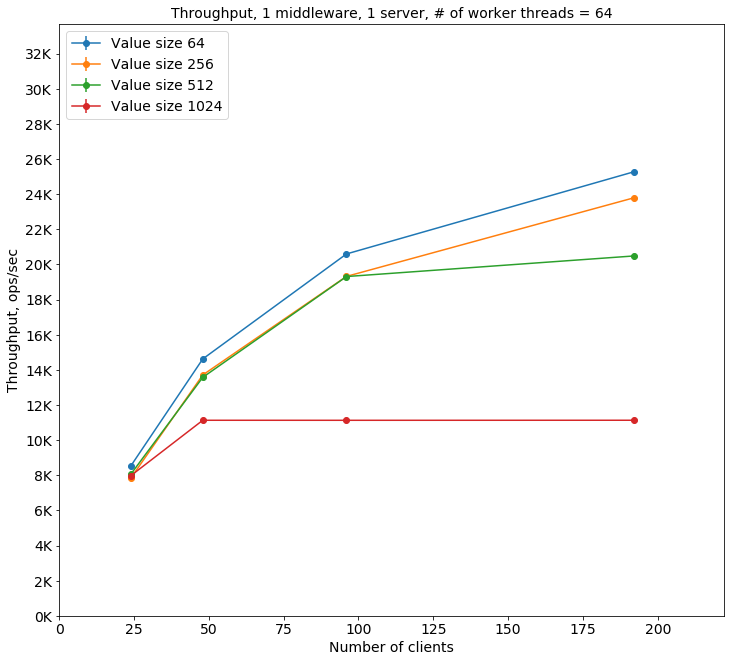

[[8538.225641025643, 14619.994871794872, 20595.051282051285, 25270.50512820513], [7847.620512820514, 13707.99487179487, 19317.184615384616, 23789.841025641024], [8067.851282051283, 13571.220512820515, 19308.923076923078, 20480.538461538465], [7978.31282051282, 11129.005128205128, 11127.220512820515, 11130.14358974359]]


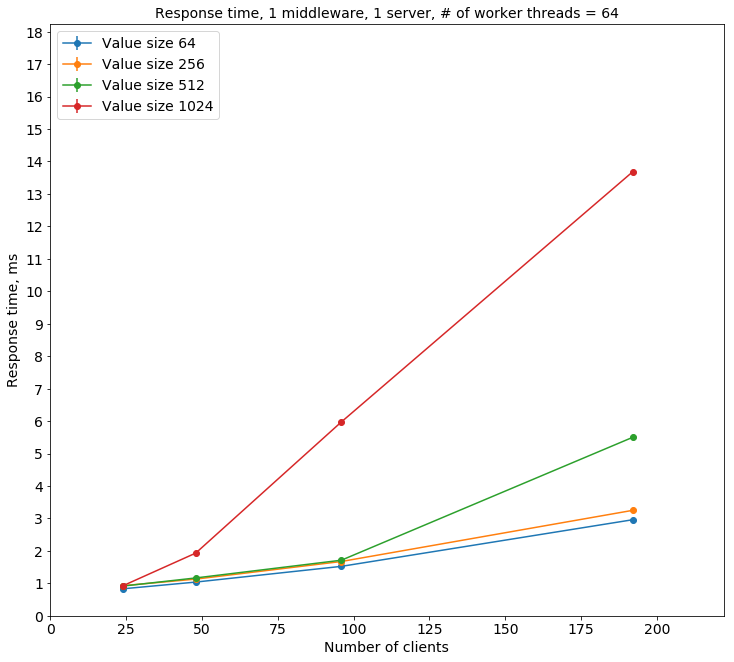

[[0.8320337979307537, 1.0389007116702487, 1.5233883668842527, 2.95972839514478], [0.928257201594996, 1.1306215089154412, 1.6730704240757068, 3.2490845586103436], [0.9153125001986357, 1.166339176265914, 1.7128278675462918, 5.4989885332041295], [0.9252409255603814, 1.9319583476948199, 5.973246480794614, 13.680522010451636]]


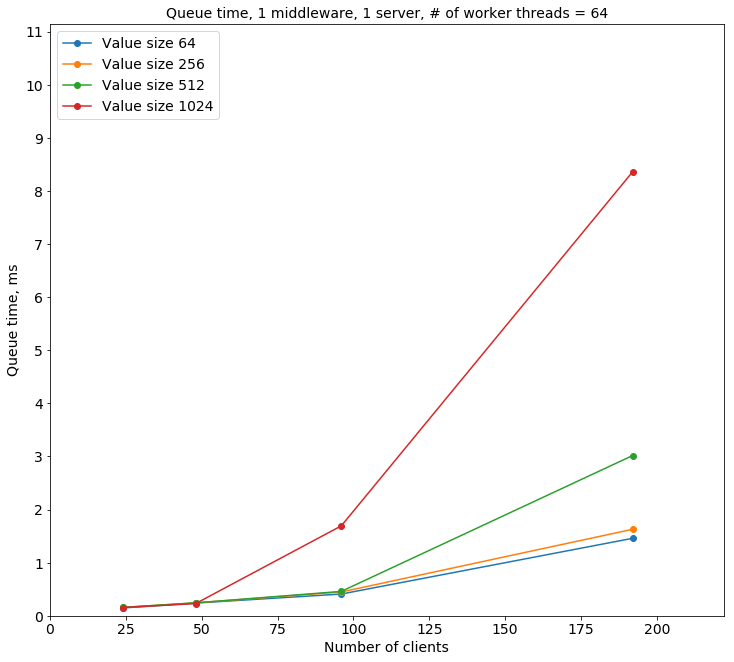

[[0.14708574531188248, 0.23990888488157597, 0.409704596697987, 1.458890363816991], [0.15819853282327617, 0.24375967758287417, 0.44829832663941316, 1.6289226235115657], [0.15779246658628007, 0.24348659380257165, 0.4594461442032911, 3.0174437020260636], [0.15541490360727897, 0.22992033752412266, 1.693136904279088, 8.359329573005255]]


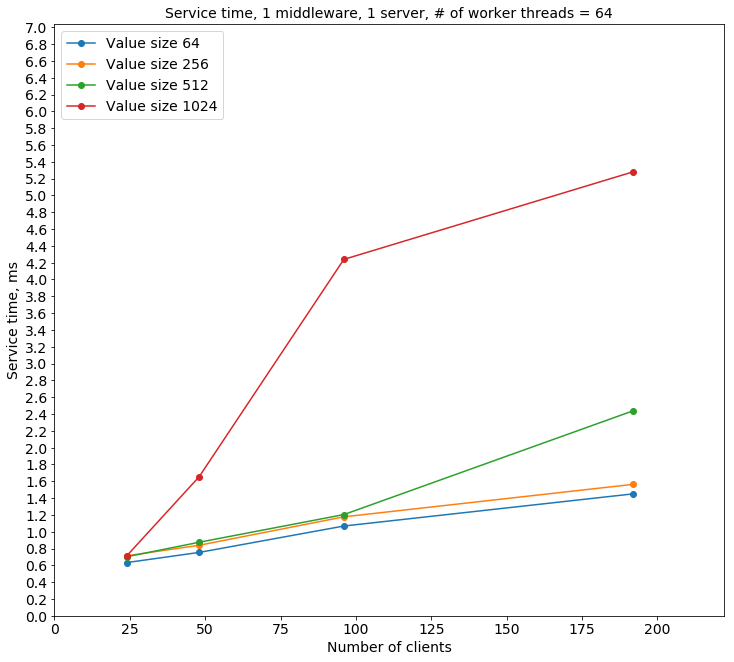

[[0.6330769498736902, 0.7537962586538492, 1.0677255053803067, 1.4504030088797093], [0.7137365172261918, 0.8389137688318888, 1.1771543392610964, 1.5637493616646105], [0.7020469339849011, 0.8746978901053057, 1.2038350808978975, 2.4386595905305977], [0.7138164935584993, 1.6539778707152848, 4.2390183831933514, 5.280804541881644]]


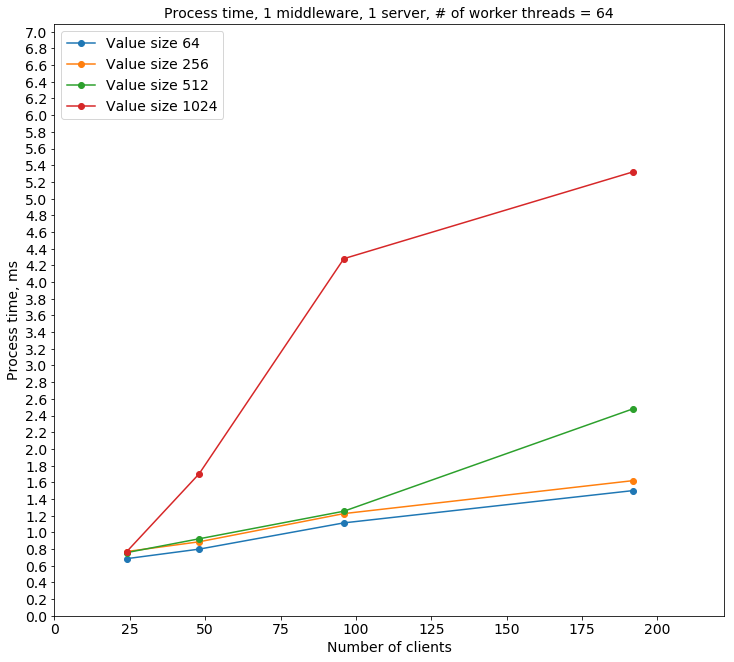

[[0.6849480526188713, 0.7989918267886726, 1.1136837701862656, 1.5008380313277896], [0.7700586687717198, 0.886861831332567, 1.2247720974362937, 1.6201619350987781], [0.7575200336123555, 0.9228525824633425, 1.2533817233430007, 2.481544831178067], [0.7698260219531023, 1.7020380101706973, 4.2801095765155255, 5.32119243744638]]


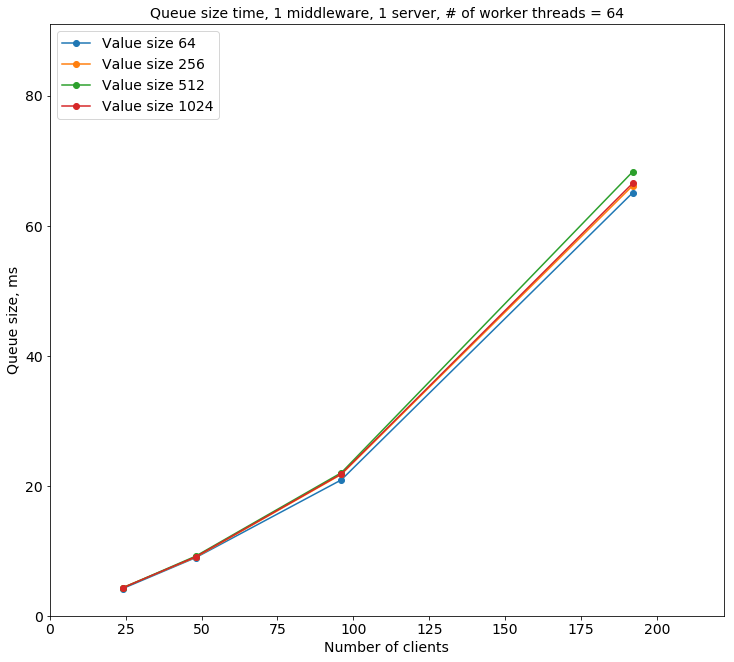

[[4.186348091298619, 8.931470388814196, 20.891346066456094, 65.04136477522142], [4.339231359366811, 8.99705131835848, 21.732045148586977, 66.13442454105059], [4.2920314944213525, 9.159230241370501, 21.98790754374223, 68.27279305807515], [4.293329802393798, 9.062964137140371, 21.811957555691563, 66.50121822097348]]


In [206]:
print("Start drawing graphs")
import numpy as np
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_mid_cl_"

X_axis = [i * 6 for i in client_numbers]
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for client_number in client_numbers:
            subset = global_data_3[(global_data_3['Worker threads'] == w) &
                                 (global_data_3['Value size'] == value_size) & 
                                 (global_data_3['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
    
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 middleware, 1 server, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()
    print(TR_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()
    print(RT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QT_overall[i]) + max(QT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_qt.pdf")
    plt.show()
    print(QT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Service time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(ST_overall)):
        plt.plot(X_axis, ST_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(ST_overall[i]) + max(ST_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 0.2))
    plt.ylabel('Service time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_st.pdf")
    plt.show()
    print(ST_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(PT_overall)):
        plt.plot(X_axis, PT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(PT_overall[i]) + max(PT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 0.2))
    plt.ylabel('Process time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.show()
    print(PT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue size time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(QS_overall)):
        plt.plot(X_axis, QS_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QS_overall[i]) + max(QS_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 20))
    plt.ylabel('Queue size, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_qs.pdf")
    plt.show()
    print(QS_overall)

Start drawing graphs


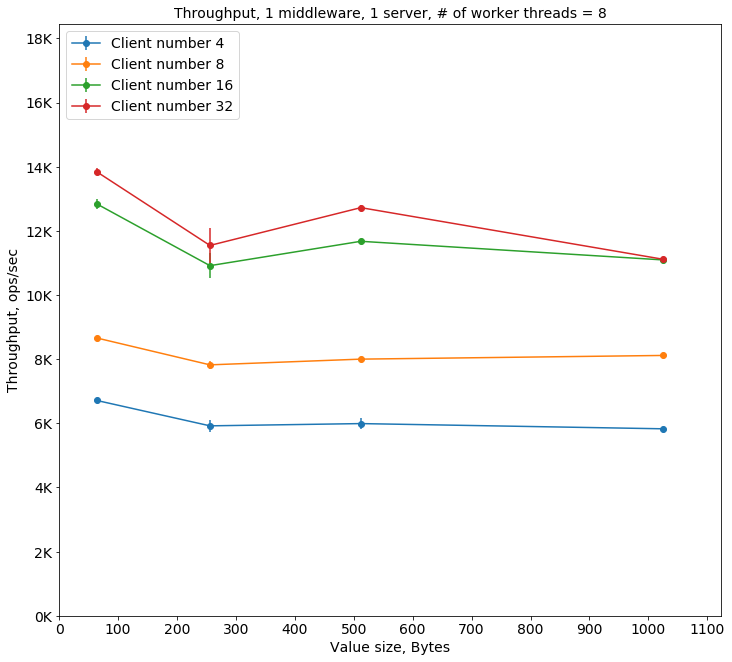

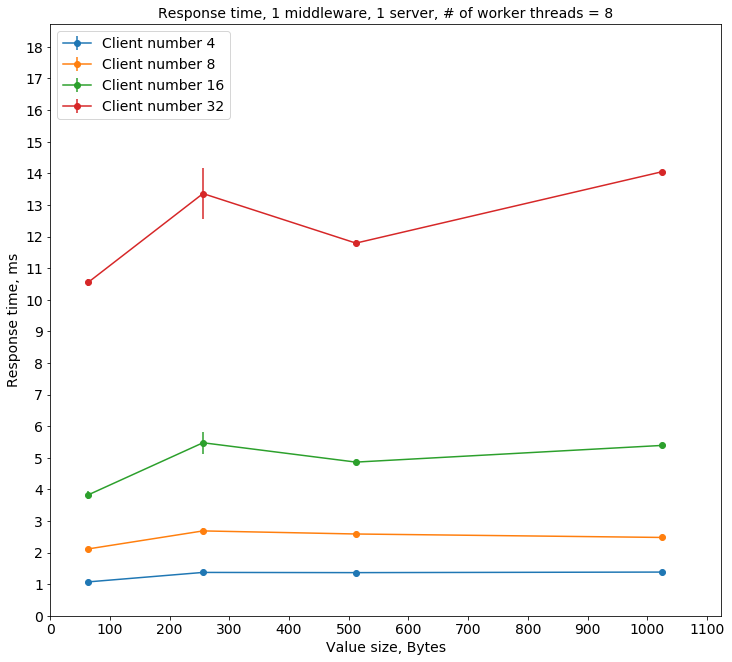

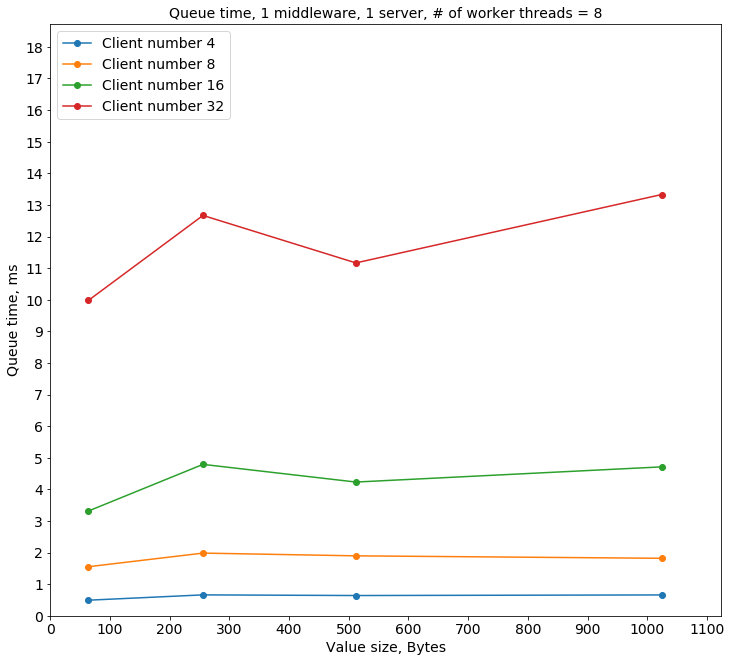

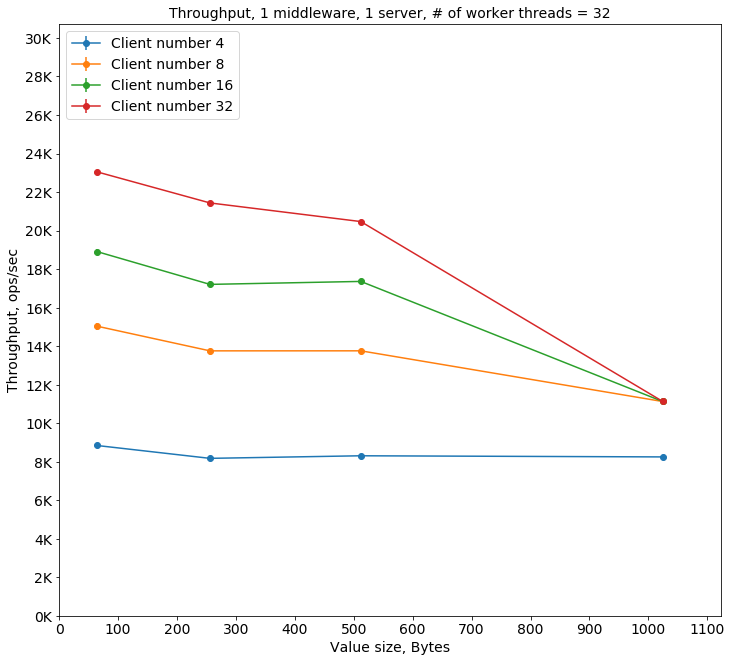

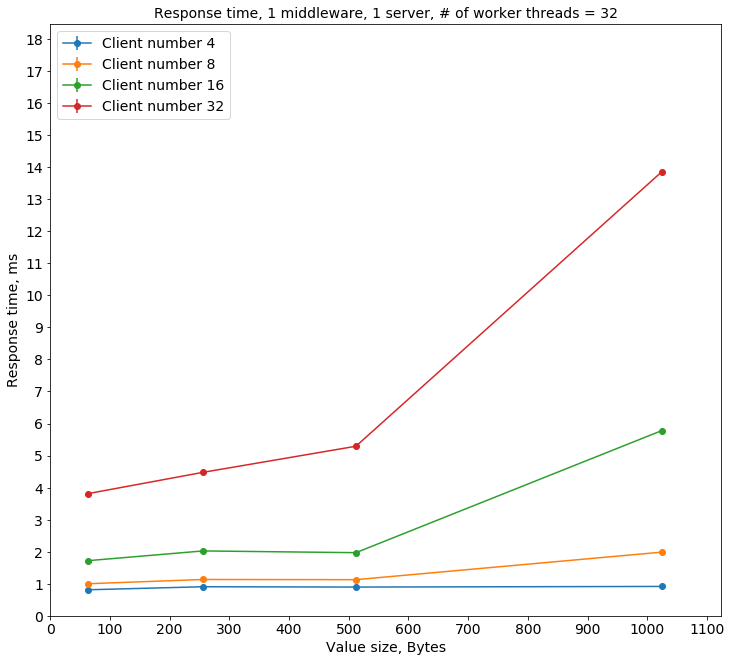

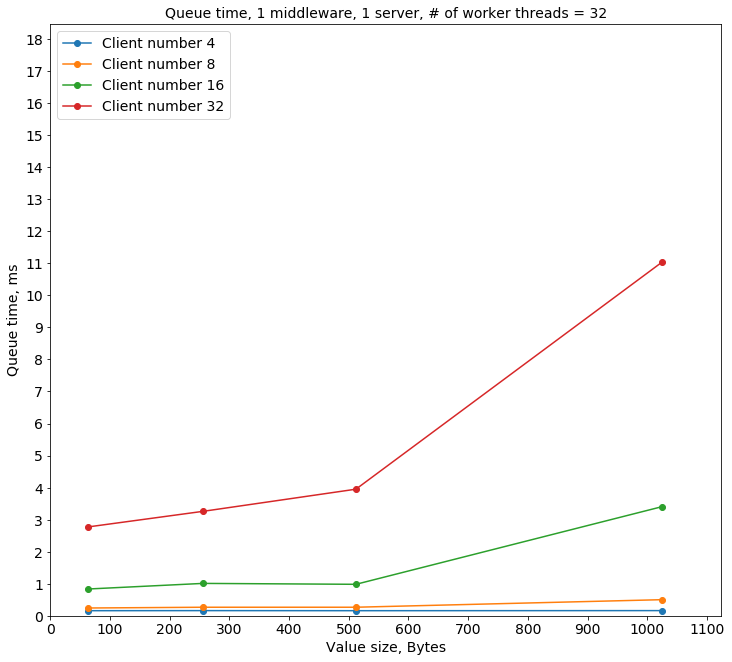

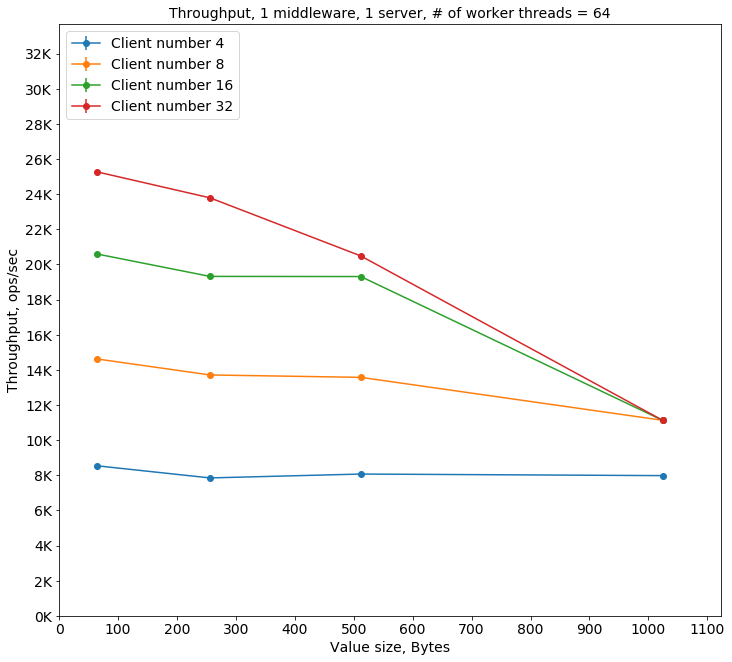

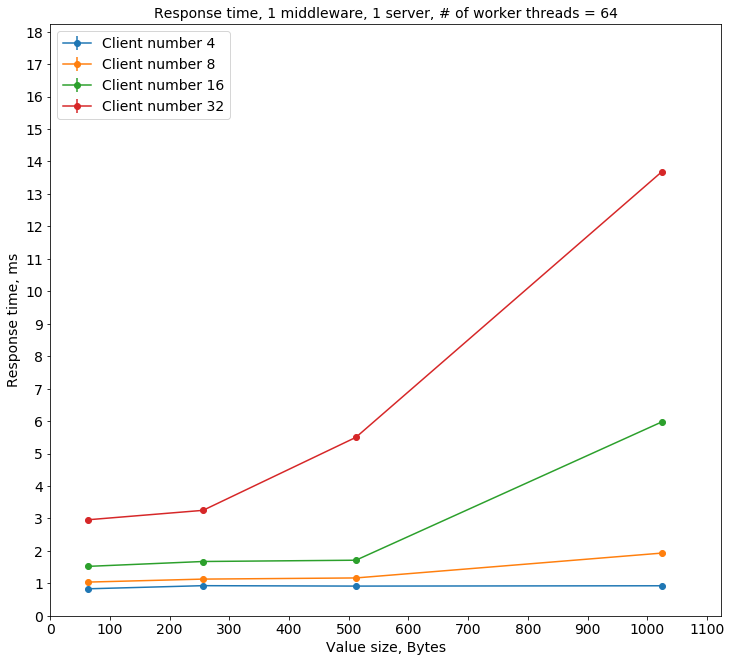

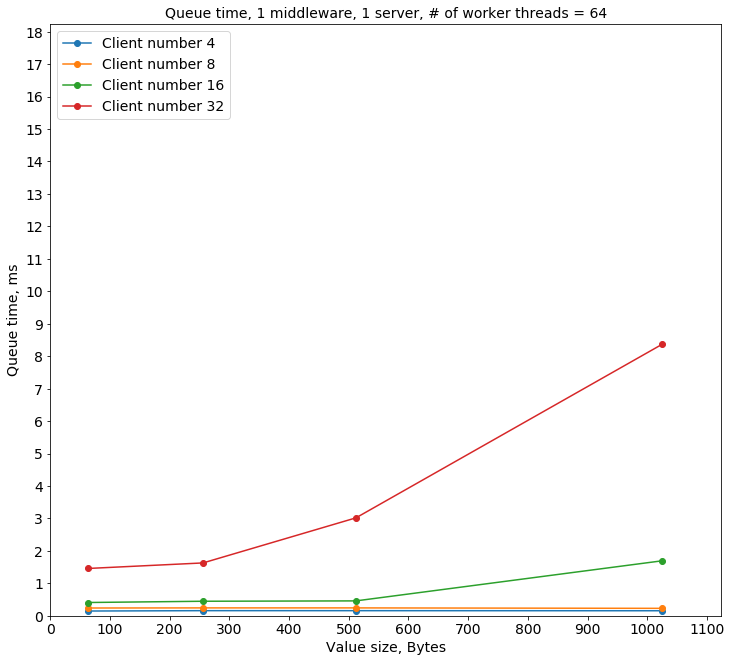

In [199]:
print("Start drawing graphs")
X_axis = value_sizes
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_mid_vl_"
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data_3[(global_data_3['Worker threads'] == w) &
                                 (global_data_3['Value size'] == value_size) & 
                                 (global_data_3['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 middleware, 1 server, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size, Bytes')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size, Bytes') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time, 1 middleware, 1 server, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Value size, Bytes') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.show()

# Client part

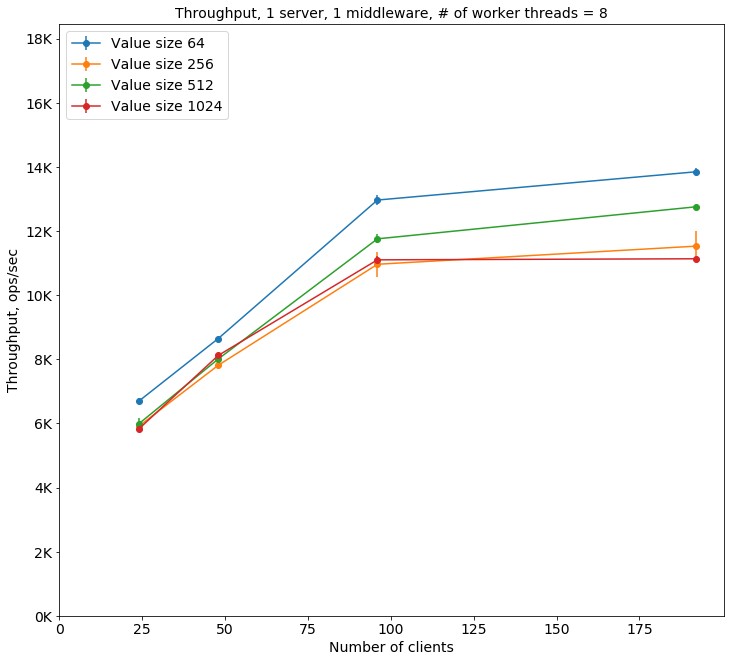

[[6690.18, 8646.693333333335, 12965.433333333332, 13846.059999999998], [5908.866666666668, 7813.793333333332, 10962.636666666667, 11527.016666666665], [5984.296666666666, 8009.56, 11755.633333333333, 12754.143333333333], [5823.083333333333, 8119.643333333333, 11100.836666666664, 11133.706666666667]]


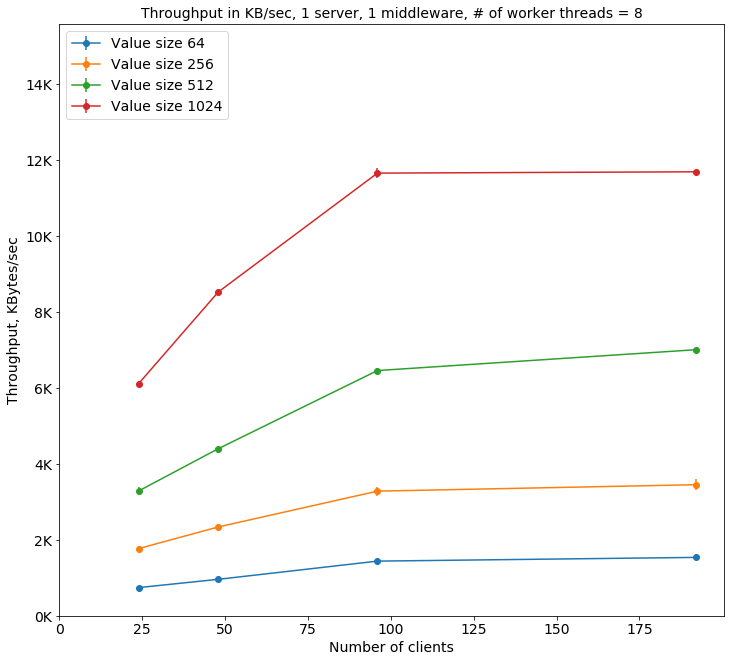

[[743.3766666666667, 960.7800000000001, 1440.5933333333332, 1538.4399999999998], [1770.243333333333, 2340.936666666667, 3284.2533333333336, 3453.3833333333337], [3288.913333333334, 4401.9800000000005, 6460.740000000001, 7009.526666666668], [6117.543333333334, 8530.236666666666, 11662.123333333331, 11696.676666666666]]


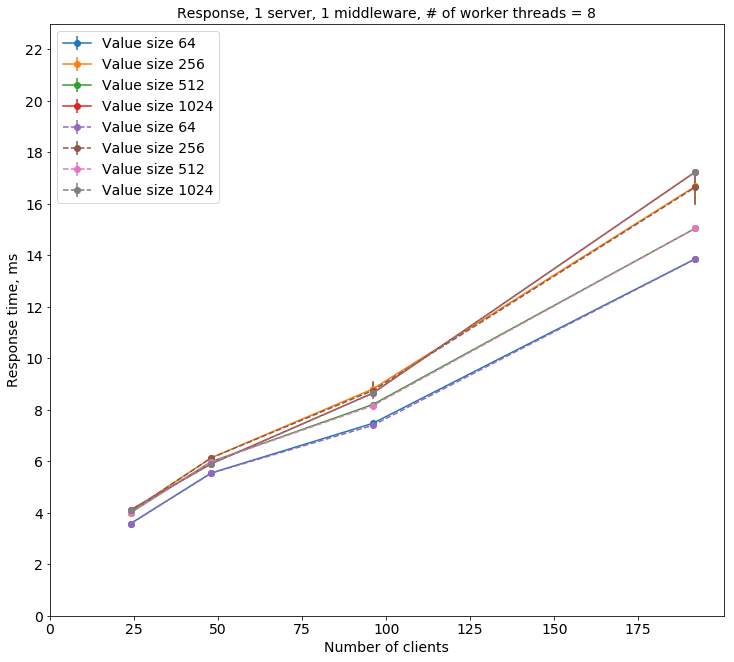

[[3.5820141305184596, 5.545889745051657, 7.471343695904242, 13.862450382384816], [4.058588411349699, 6.137982297694372, 8.804947737953327, 16.678858181641857], [4.007817389021116, 5.98708707038687, 8.20073643630502, 15.049135987553575], [4.115561443175756, 5.906071986594601, 8.643752155191695, 17.239494613511578]]


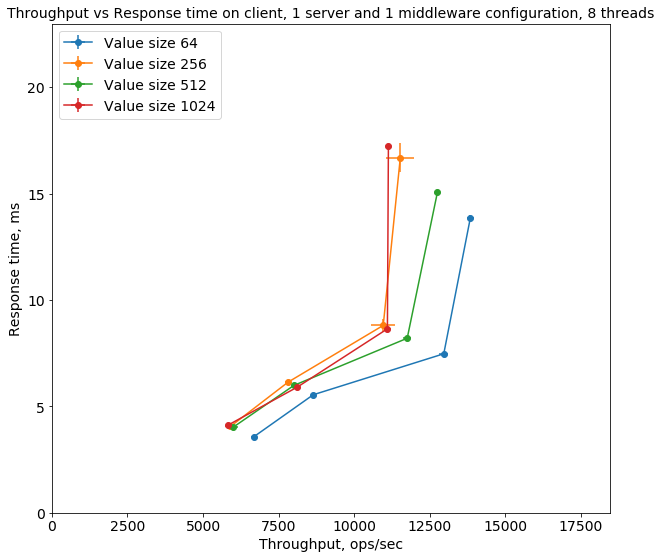

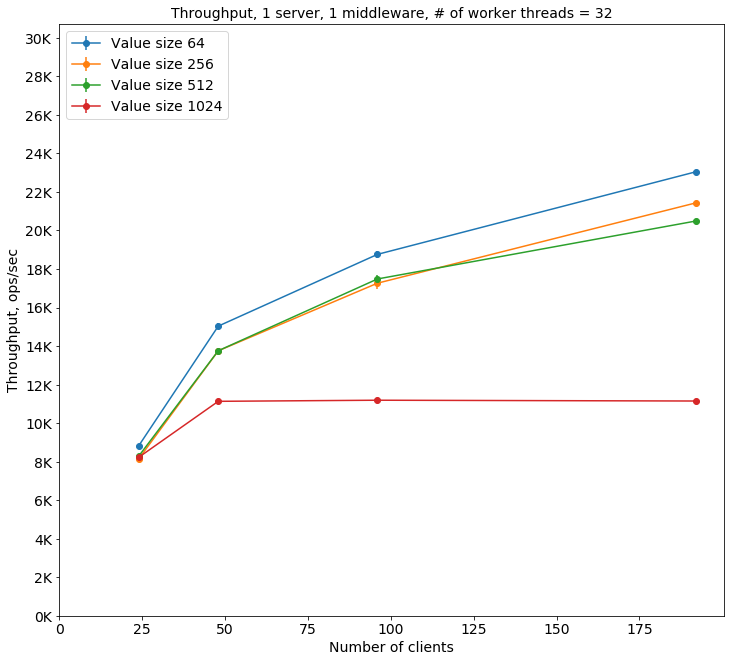

[[8820.94, 15036.526666666667, 18760.829999999998, 23046.77666666666], [8145.13, 13755.123333333331, 17265.163333333334, 21432.706666666665], [8282.823333333334, 13758.206666666667, 17483.826666666664, 20491.899999999998], [8224.946666666667, 11133.136666666667, 11190.173333333334, 11148.833333333334]]


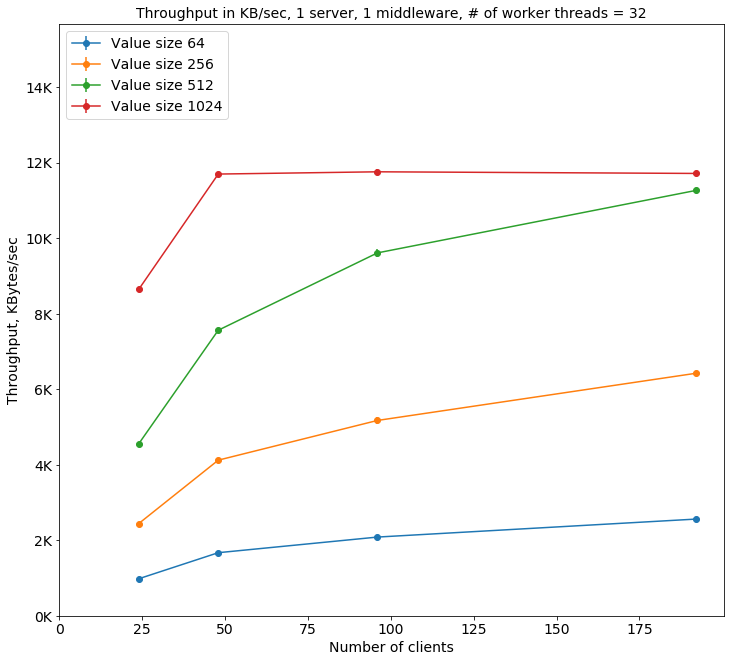

[[980.1333333333333, 1670.8033333333333, 2084.603333333333, 2560.7233333333334], [2440.2233333333334, 4120.916666666667, 5172.5, 6420.956666666668], [4552.176666666667, 7561.393333333333, 9608.960000000001, 11262.113333333333], [8640.880000000001, 11696.116666666669, 11755.970000000001, 11712.573333333334]]


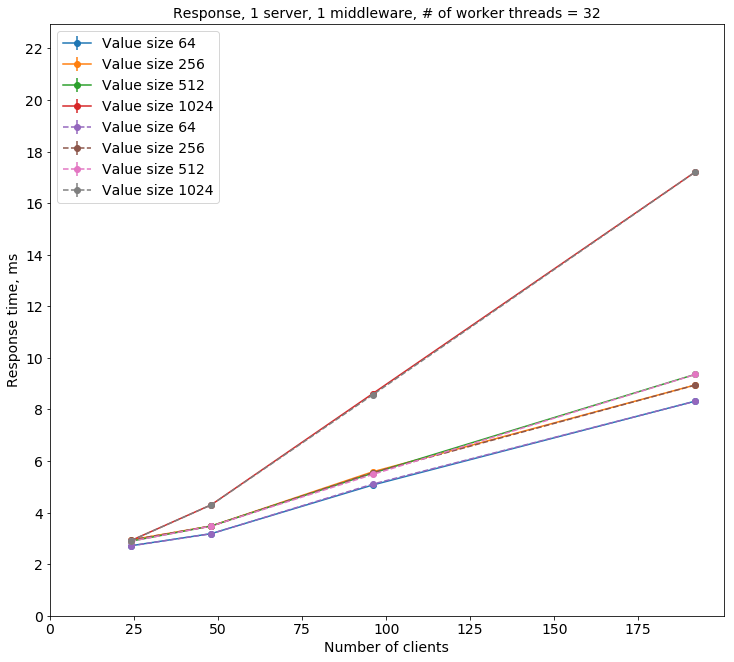

[[2.715293903438075, 3.187454417816135, 5.0713365048551635, 8.326475759462097], [2.941087206618682, 3.484577633504499, 5.583291386208384, 8.953592987357277], [2.892227992867625, 3.4839840675112304, 5.530799779681911, 9.365230183294397], [2.912192488993099, 4.306142985288315, 8.615405619851709, 17.21675837371006]]


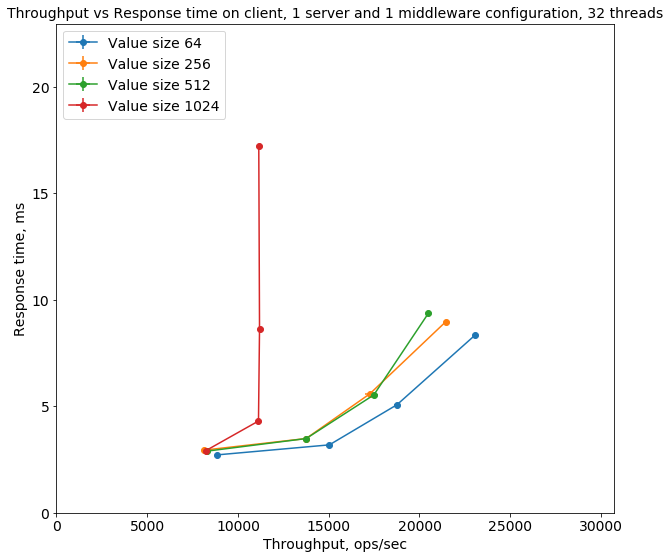

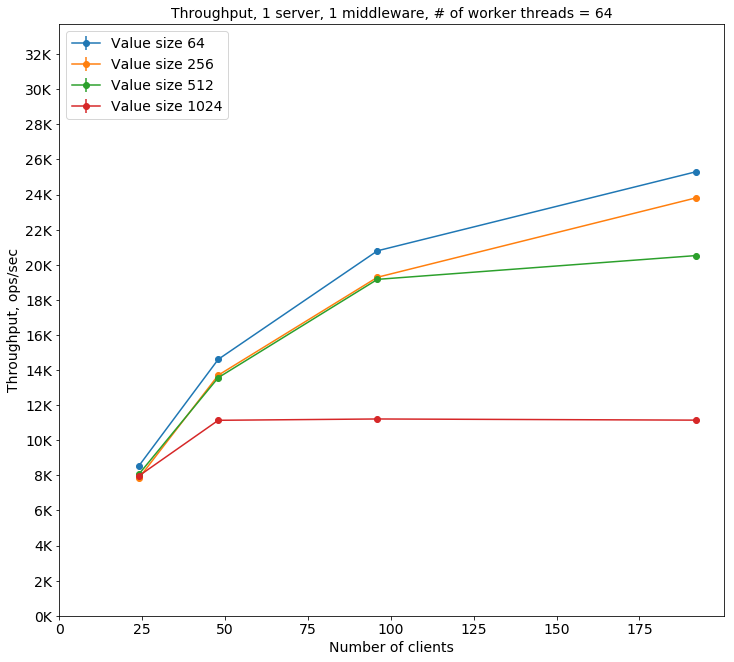

[[8525.39, 14611.686666666666, 20794.076666666668, 25294.53], [7827.126666666667, 13707.666666666666, 19287.39333333333, 23806.146666666667], [8054.87, 13567.693333333335, 19166.966666666664, 20520.93], [7960.813333333333, 11137.706666666667, 11213.153333333335, 11146.82]]


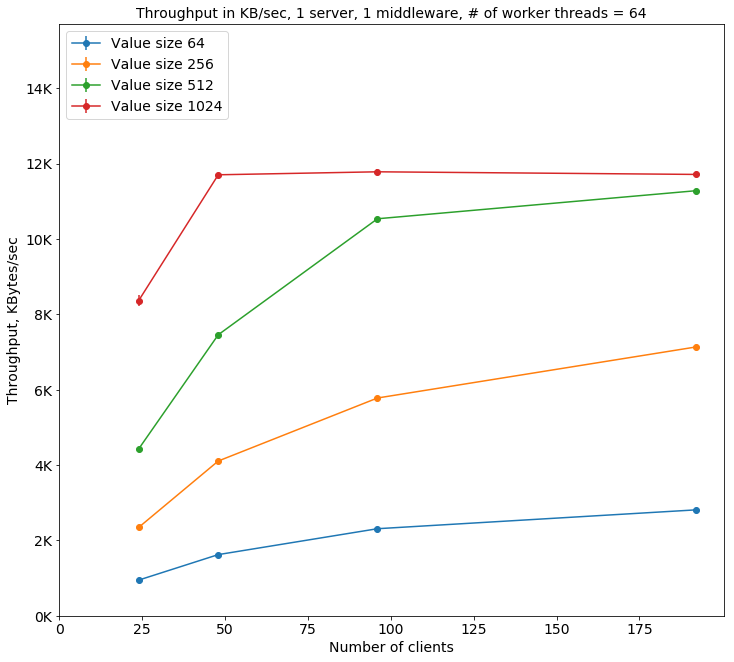

[[947.3033333333333, 1623.5966666666666, 2310.5433333333335, 2810.4799999999996], [2344.9533333333334, 4106.7, 5778.333333333333, 7132.009999999999], [4426.903333333333, 7456.69, 10534.000000000002, 11278.07], [8363.39, 11700.909999999998, 11780.113333333333, 11710.460000000001]]


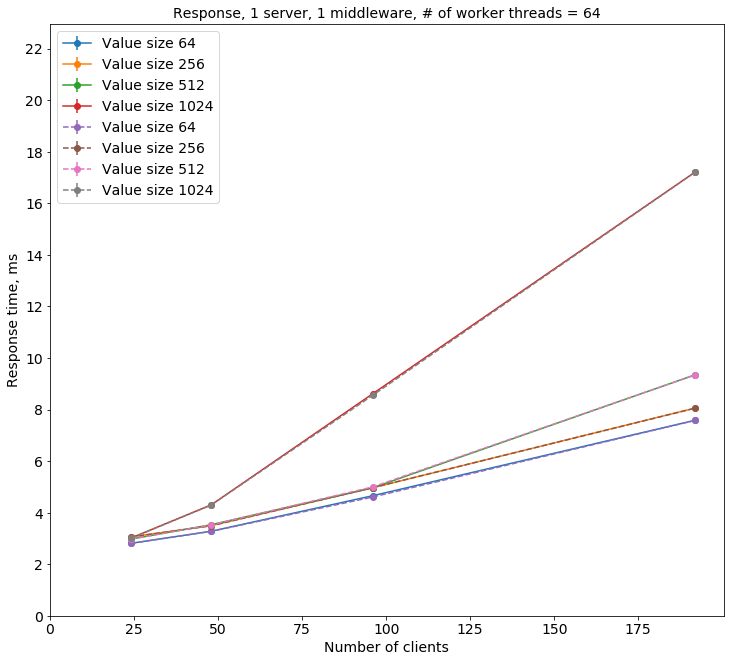

[[2.8100127368201147, 3.280464607644543, 4.656877790399568, 7.585927103940378], [3.0616810205638507, 3.4966717822637237, 4.964844289772899, 8.06064492465574], [2.9739684072175816, 3.5327516164160024, 4.964515628554802, 9.351539043853151], [3.009690155690093, 4.304324160415298, 8.611625856421734, 17.220043937129045]]


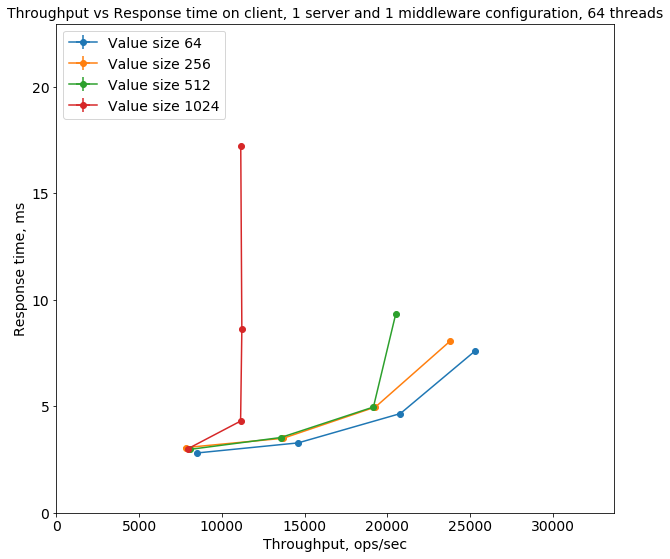

In [205]:
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_TR_value_file.txt", "w+")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_cl_RT_value_file.txt", "w+")

path_to_experiment="/home/anastasiia/final_ex/final_copy/part3/"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_cl_cl_"


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], parts[5], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'TR_B', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2], clients_data[memtier * experiments + k][3]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['TR_B'] = global_data['TR_B'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_B_overall = []
    TR_error_overall = []
    RT_error_overall = []
    TR_B_error_overall = []
    RT_overall_with_formula = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_B = []
        TR_error = []
        RT_error = []
        TR_B_error = []

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(float(groupped.mean()['TR'])))
            for v in groupped['TR'].values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
            
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
            # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped2.mean()))
            for v in groupped2.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            # end print to file
            
            groupped3 = subset.groupby(['Repetition']).sum()
            TR_B.append(float(groupped3.mean()['TR_B']))
            TR_std = np.std(groupped['TR_B'].values)
            TR_B_error.append(TR_std)
            
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_B_overall.append(TR_B)
        TR_error_overall.append(TR_error)
        TR_B_error_overall.append(TR_B_error)
        RT_error_overall.append(RT_error)
        RT_overall_with_formula.append([(1/t) * 1000 * c - 0.01 for t, c in zip(TR, X_axis)])

    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 server, 1 middleware, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()
    print(TR_overall)
    
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput in KB/sec, 1 server, 1 middleware, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_B_overall)):
        plt.errorbar(X_axis, TR_B_overall[i],
                yerr=TR_B_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_B_overall[i]) + max(TR_B_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, KBytes/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr_b.pdf")
    plt.show()
    print(TR_B_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response, 1 server, 1 middleware, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    for i in range(len(RT_overall_with_formula)):
        plt.errorbar(X_axis, RT_overall_with_formula[i],
                yerr=RT_error_overall[i],
                fmt='--o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.savefig(prefix + str(w) + "_confirm_law.pdf")
    plt.show()
    print(RT_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput vs Response time on client, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    tr_max = 0
    for i in range(len(TR_overall)):
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > tr_max:
            tr_max = max2
    plt.ylim(0, max1)
    plt.xlim(0, tr_max)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.show()
    
TR_value_file.close()
RT_value_file.close()

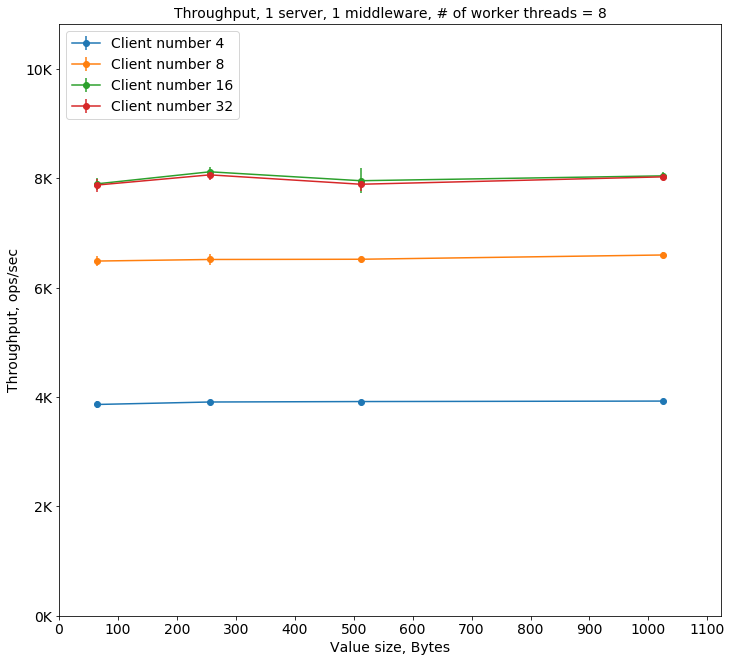

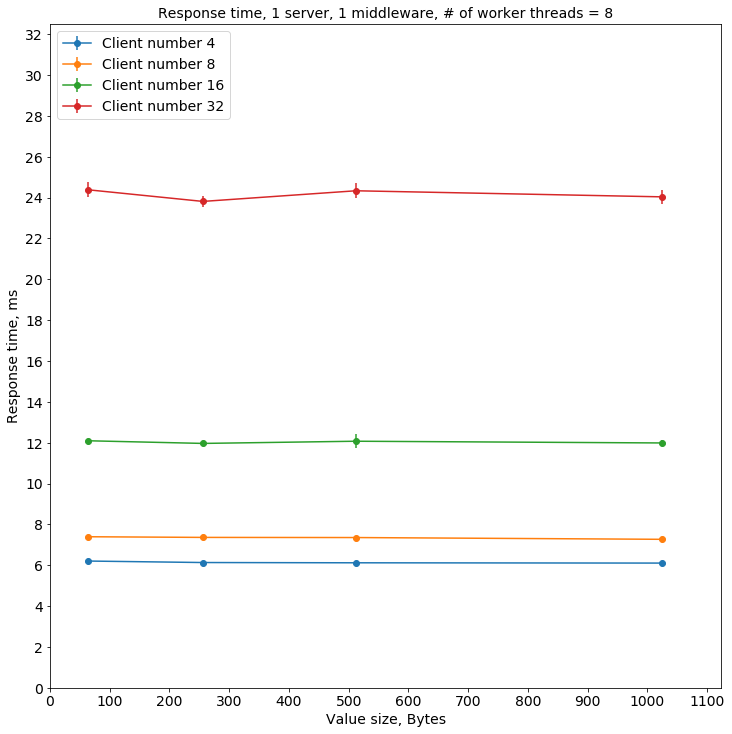

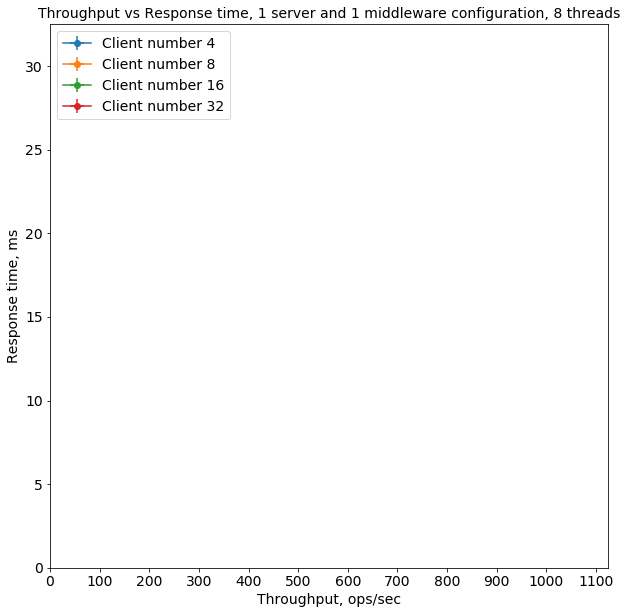

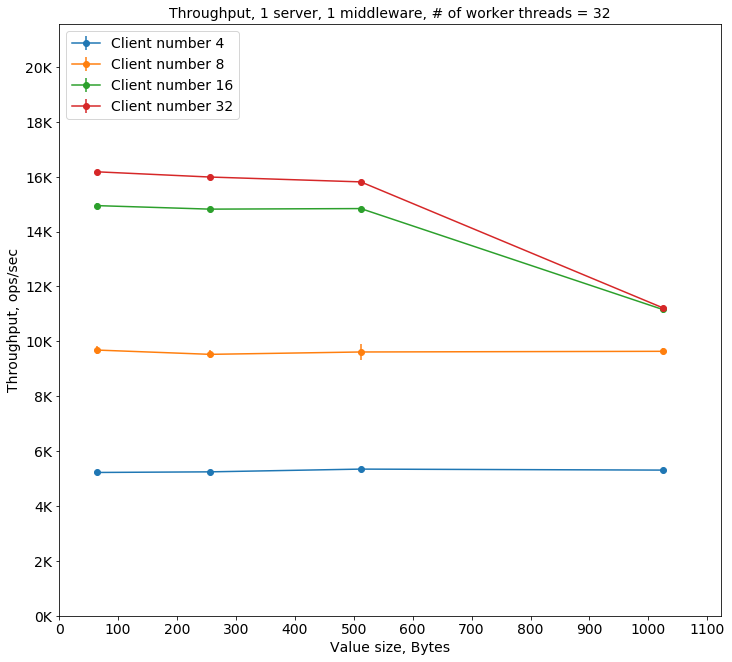

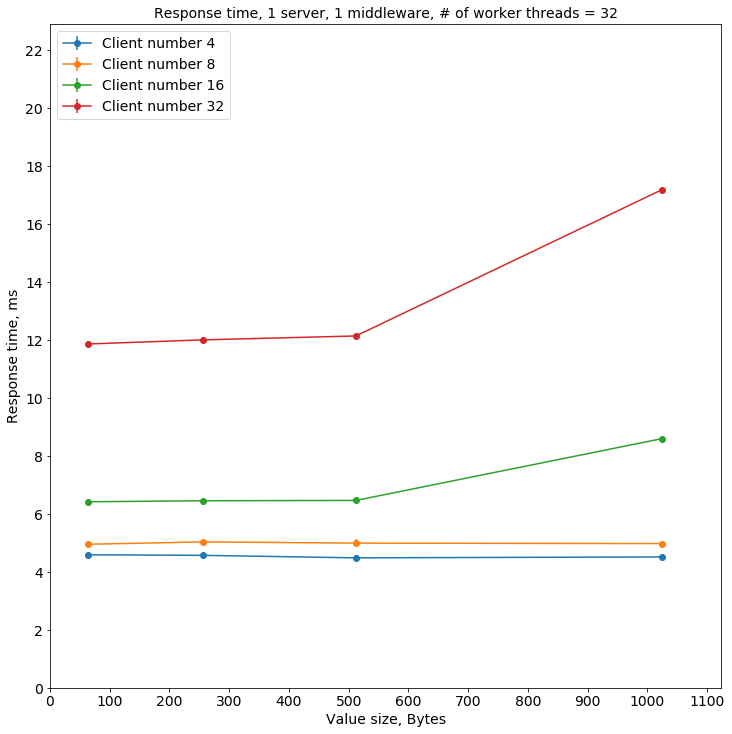

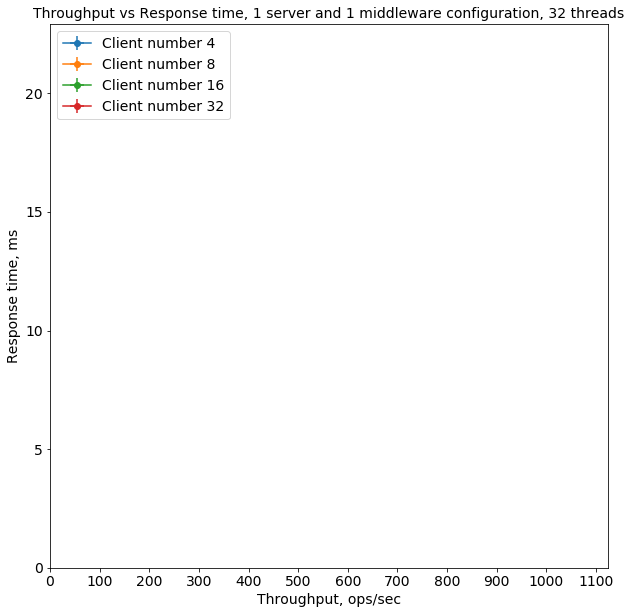

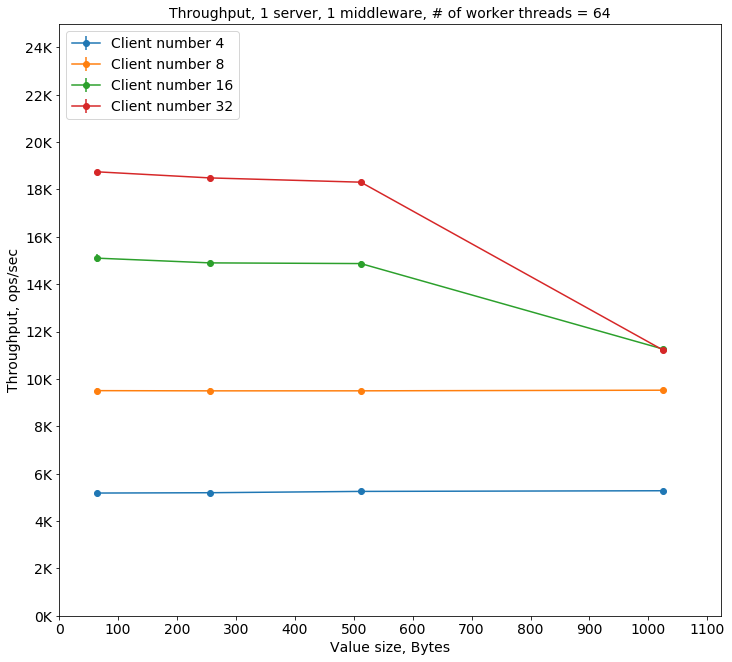

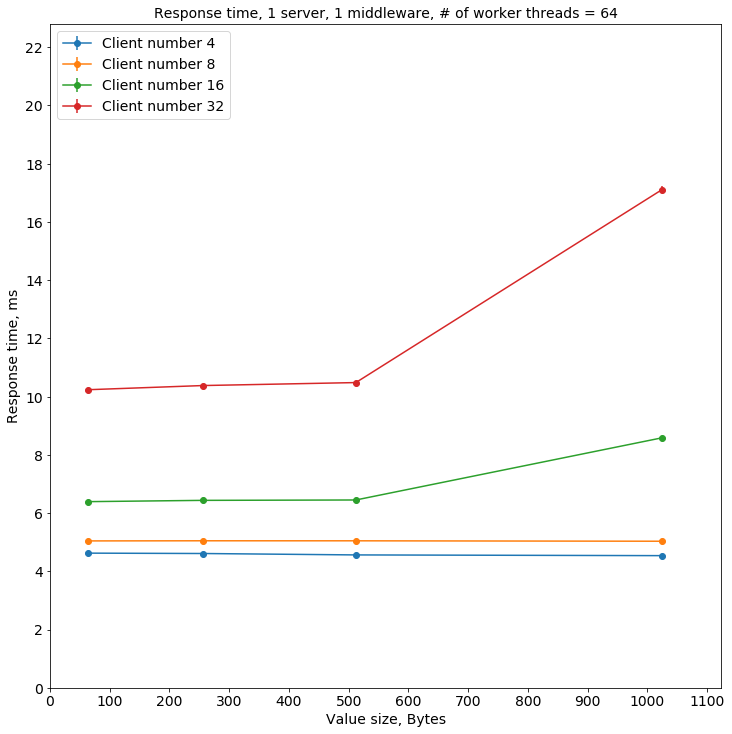

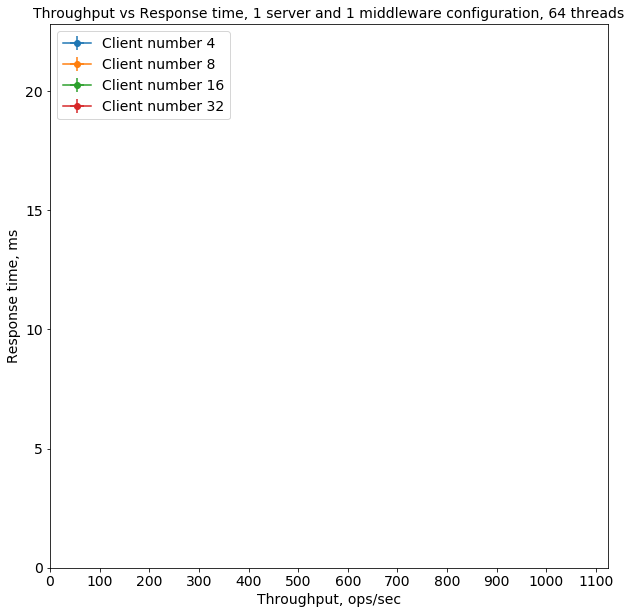

In [201]:
path_to_experiment="/home/anastasiia/experiment_1/fourth_copy/part3/"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part3_mid_cl_vl_"


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis = value_sizes

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)

    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 server, 1 middleware, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size, Bytes')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_tr.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time, 1 server, 1 middleware, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size, Bytes') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_rt.pdf") 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    tr_max = 0
    for i in range(len(TR_overall)):
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > tr_max:
            tr_max = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.show()

In [ ]:
for i in range(len(TR_overall)):
    print(TR_overall[i])
    print(RT_overall[i])
    print([(1/t) * 1000 * c - r1 for t, c, r1 in zip(TR_overall[i], X_axis, RT_overall[i])])
    for j in range(len(TR_overall[i]) - 1):
        print((RT_overall[i][j+1]-RT_overall[i][j])/(X_axis[j+1]-X_axis[j]))
    RT_Z = [(1/t) * 1000 * c for t, c in zip(TR_overall[i], X_axis)]
    plt.figure(figsize=(10,10))
    plt.plot(X_axis, RT_Z)
    plt.ylim(0, max(RT_Z) + max(RT_Z)/2)
    plt.show()

In [104]:
TR_MAX = 16206.52
TR = np.array([5231.379487179488, 9694.271794871796, 14943.916117216117, 16169.902564102564])
RT = np.array([1.5266963952244785, 1.7436725785198028, 2.8998161574088632, 8.550608902706548])
QT = np.array([0.18896226812754197, 0.41706310308545946, 1.4471863988594802, 6.595007946070111])
ST = np.array([1.2581512549026144, 1.2710535378280488, 1.3996067588243442, 1.910121082822122])
PT = np.array([1.3377341270969367, 1.3266094754343434, 1.4526297585493828, 1.9556009566364352])
QS = np.array([4.6302676452453095, 10.741923197574248, 33.807884157759425, 97.30760218969652])
SR = 1000/ ST
print("Service rate based on service time=", SR)

po = TR / TR_MAX
print("utilization=", po)
ST1 = 1000 / TR_MAX
print("service time based on max throughput=", ST1)
MU = 1000 / ST
print("service rate based on service time=", MU)
QT1 = (QS / TR) * 1000
print("Queue time according to little's law=", QT1)
RT1 = QT1 + ST
print("Response time1=", RT1)
print("\n")

print(po / (1 - po))
print((1/TR_MAX))

Service rate based on service time= [794.81699526 786.74892146 714.48640391 523.52702087]
utilization= [0.32279474 0.59817109 0.92209284 0.99774057]
service time based on max throughput= 0.06170356128274299
service rate based on service time= [794.81699526 786.74892146 714.48640391 523.52702087]
Queue time according to little's law= [0.88509497 1.10806912 2.26231758 6.01782242]
Response time1= [2.14324622 2.37912266 3.66192434 7.9279435 ]


[  0.47665718   1.48862136  11.83579135 441.59024704]
6.1703561282743e-05


In [101]:
TR_MAX = 11345.03
TR = np.array([5291.9025641025655, 9527.779487179487, 11154.066666666668, 11163.574358974356])
RT = np.array([1.496147476405655, 1.8204623780287281, 5.346322808330685, 13.93469695626389])
QT = np.array([0.18654916413175038, 0.3916778844264841, 1.4608934168198053, 8.472605731920252])
ST = np.array([1.229823794650947, 1.3708857823035154, 3.8315876973466727, 5.411628111022249])
PT = np.array([1.3095983122739046, 1.428784493602244, 3.88542939151088, 5.462091224343641])
QS = np.array([4.588902638864797, 10.931445269083603, 24.440098425640322, 67.9044300212642])

po = TR / TR_MAX
print("utilization=", po)
ST1 = 1000 / TR_MAX
print("service time based on max throughput=", ST1)
MU = 1000 / ST
print("service rate based on service time=", MU)
QT1 = (QS / TR) * 1000
print("Queue time according to little's law=", QT1)
RT1 = QT1 + ST
print("Response time1=", RT1)

utilization= [0.46645117 0.83981968 0.98316767 0.98400572]
service time based on max throughput= 0.0881443239903288
service rate based on service time= [813.12461537 729.45537324 260.98841498 184.78727279]
Queue time according to little's law= [0.86715554 1.1473235  2.19113792 6.08267817]
Response time1= [ 2.09697934  2.51820928  6.02272562 11.49430628]


In [ ]:
plt.figure(figsize=(10, 9))
plt.title("Response time, 1 server, 1 middleware, # of worker threads = "+str(w))
max1 = 0
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 27, 36, 45, 72], [0.653, 0.56, 0.53, 0.54, 0.54, 0.57, 0.61, 0.63, 0.67, 0.77, 0.89, 1.04, 1.34, 1.61, 1.82, 2.53])
plt.ylim(0, 5)
plt.ylabel('Response time, ms')
plt.xlabel('Number of clients')
plt.yticks(np.arange(0, 5, 0.4))
plt.tplt.savefig(prefix + str(w)+"_rt.pdf") ight_layout(0)
plt.savefig(prefix + str(w)+"_rt.pdf") 
plt.show()